   # Taxi-Out Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore 
from scipy.stats import shapiro
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

#### Reading the Dataset

In [2]:
df = pd.read_csv('Taxi_out_processed.csv')
df = df.drop('Unnamed: 0',axis = 1)

In [3]:
df.head(3)

,DAY_OF_WEEK,CARRIER_CODE,DEST,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEPARTURE,ACTUAL_DEPATURE,SCHEDULED_ARRIVAL,Temperature,...,Wind Speed,Wind Gust,Pressure,Condition,FLT_SCH_DEPATURE,FLT_SCH_ARRIVAL,TAXI_OUT,SPEED,Region,FLIGHT_TRAFFIC
0,5,DL,SFO,EARLY,6.516667,4161.75324,Morning,Morning,Morning,47,...,24,29,30.0,Fair / Windy,17,21,L,638.632211,West,Medium
1,5,DL,SLC,EARLY,5.350000,3202.58660,Morning,Morning,Morning,47,...,24,29,30.0,Fair / Windy,17,21,H,598.614318,West,Medium
2,5,DL,BOS,EARLY,1.366667,300.94658,Morning,Morning,Morning,47,...,24,29,30.0,Fair / Windy,17,21,L,220.204815,North East,Medium


#### NUMERICAL AND CATEGORICAL FEATURES

In [4]:
df_num = df.select_dtypes(include=np.number)
print('numerical : ', df_num.columns)

numerical :  Index(['DAY_OF_WEEK', 'SCHEDULED_DURATION', 'DISTANCE', 'Temperature',
       'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure',
       'FLT_SCH_DEPATURE', 'FLT_SCH_ARRIVAL', 'SPEED'],
      dtype='object')


df_cat = df.select_dtypes(include=np.object)
print('categorical : ', df_cat.columns)

#### HEAT MAP | CORRELLATON

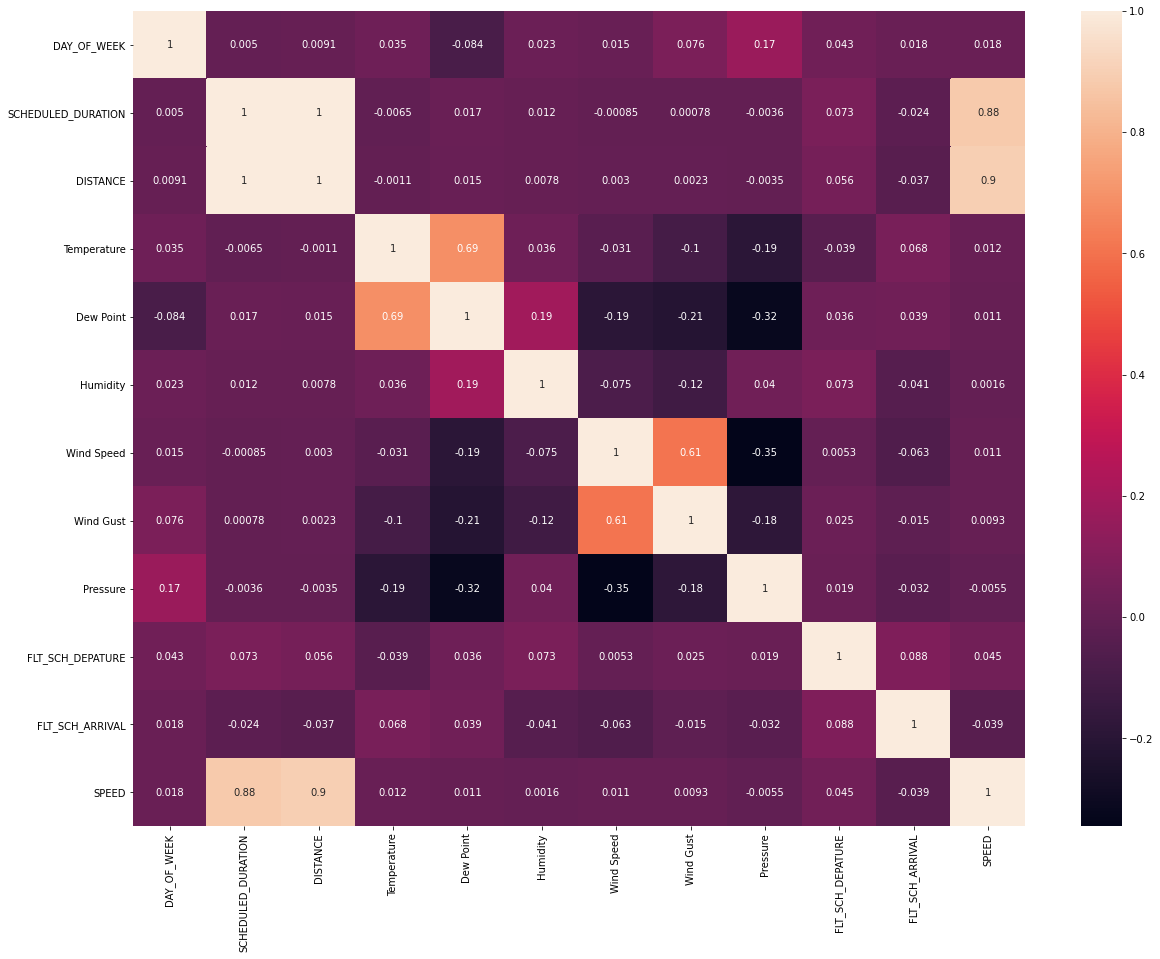

In [5]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

#### MULTICOLLINEARITY 

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif.sort_values('VIF',ascending = False)
    return(vif.sort_values('VIF',ascending = False))

In [8]:
X =df_num
calc_vif(X)

,Features,VIF
1,SCHEDULED_DURATION,889.048353
2,DISTANCE,664.987035
8,Pressure,194.223457
11,SPEED,96.208746
3,Temperature,94.123642
4,Dew Point,24.660165
9,FLT_SCH_DEPATURE,19.329379
10,FLT_SCH_ARRIVAL,17.992058
6,Wind Speed,10.701396
5,Humidity,9.615271


In [9]:
df = df.drop('SCHEDULED_DURATION',axis = 1)
df_num = df.select_dtypes(include=np.number)

In [10]:
calc_vif(df_num)

,Features,VIF
7,Pressure,125.510945
2,Temperature,93.243738
10,SPEED,81.426490
3,Dew Point,24.451795
8,FLT_SCH_DEPATURE,18.570862
9,FLT_SCH_ARRIVAL,17.585662
1,DISTANCE,16.335256
5,Wind Speed,10.701132
4,Humidity,9.611563
0,DAY_OF_WEEK,5.334904


In [11]:
df = df.drop('Pressure',axis = 1)
df_num = df.select_dtypes(include=np.number)

In [12]:
calc_vif(df_num)

,Features,VIF
2,Temperature,68.605427
9,SPEED,62.235272
3,Dew Point,23.414182
7,FLT_SCH_DEPATURE,16.356256
8,FLT_SCH_ARRIVAL,15.878513
1,DISTANCE,13.964969
5,Wind Speed,10.362107
4,Humidity,8.920433
0,DAY_OF_WEEK,5.275752
6,Wind Gust,1.902465


In [13]:
df = df.drop('Temperature',axis = 1)
df_num = df.select_dtypes(include=np.number)

In [14]:
calc_vif(df_num)

,Features,VIF
8,SPEED,53.161765
6,FLT_SCH_DEPATURE,16.189854
7,FLT_SCH_ARRIVAL,14.640652
1,DISTANCE,12.755748
2,Dew Point,10.947849
4,Wind Speed,9.460866
3,Humidity,8.920325
0,DAY_OF_WEEK,5.017057
5,Wind Gust,1.885518


In [15]:
df = df.drop('SPEED',axis = 1)
df_num = df.select_dtypes(include=np.number)

In [16]:
calc_vif(df_num)

,Features,VIF
6,FLT_SCH_DEPATURE,15.146604
7,FLT_SCH_ARRIVAL,13.233854
2,Dew Point,10.330130
4,Wind Speed,8.768272
3,Humidity,8.700030
0,DAY_OF_WEEK,4.865049
1,DISTANCE,3.107076
5,Wind Gust,1.874208


In [17]:
df = df.drop('FLT_SCH_DEPATURE',axis = 1)
df_num = df.select_dtypes(include=np.number)

In [18]:
calc_vif(df_num)

,Features,VIF
6,FLT_SCH_ARRIVAL,11.308004
2,Dew Point,9.825869
4,Wind Speed,8.384294
3,Humidity,8.294777
0,DAY_OF_WEEK,4.728170
1,DISTANCE,3.041502
5,Wind Gust,1.872685


In [19]:
df = df.drop('FLT_SCH_ARRIVAL',axis = 1)
df_num = df.select_dtypes(include=np.number)

In [20]:
calc_vif(df_num)

,Features,VIF
2,Dew Point,8.206826
3,Humidity,7.970327
4,Wind Speed,7.681992
0,DAY_OF_WEEK,4.406451
1,DISTANCE,3.002040
5,Wind Gust,1.864799


##### Columns

In [21]:
df.columns

Index(['DAY_OF_WEEK', 'CARRIER_CODE', 'DEST', 'DEP_DELAY', 'DISTANCE',
       'SCHEDULED_DEPARTURE', 'ACTUAL_DEPATURE', 'SCHEDULED_ARRIVAL',
       'Dew Point', 'Humidity', 'Wind', 'Wind Speed', 'Wind Gust', 'Condition',
       'TAXI_OUT', 'Region', 'FLIGHT_TRAFFIC'],
      dtype='object')

#### Categorical and numerical columns:

In [22]:
num = df.select_dtypes(exclude = 'object')
num.columns

Index(['DAY_OF_WEEK', 'DISTANCE', 'Dew Point', 'Humidity', 'Wind Speed',
       'Wind Gust'],
      dtype='object')

In [23]:
cat = df.select_dtypes(include = 'object')
cat.columns

Index(['CARRIER_CODE', 'DEST', 'DEP_DELAY', 'SCHEDULED_DEPARTURE',
       'ACTUAL_DEPATURE', 'SCHEDULED_ARRIVAL', 'Wind', 'Condition', 'TAXI_OUT',
       'Region', 'FLIGHT_TRAFFIC'],
      dtype='object')

#### Label Encoding | Target Variable

In [24]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [25]:
cat['TAXI_OUT'] =LE.fit_transform(cat['TAXI_OUT'])
y = cat['TAXI_OUT']
cat = cat.drop('TAXI_OUT',axis=1)

In [26]:
y.unique()

array([1, 0])

#### One Hot Encoding

In [27]:
cat_OHE=[]
for i in cat.columns:
    if cat[i].nunique() >5:
        cat[i]=LE.fit_transform(cat[i])
    else:
        cat_OHE.append(i)
print(cat_OHE)

['DEP_DELAY', 'SCHEDULED_DEPARTURE', 'ACTUAL_DEPATURE', 'SCHEDULED_ARRIVAL', 'Wind', 'Region', 'FLIGHT_TRAFFIC']


In [28]:
cat=pd.get_dummies(data=cat,columns=cat_OHE,drop_first=True)

In [29]:
cat.head(3)

,CARRIER_CODE,DEST,Condition,DEP_DELAY_EARLY,DEP_DELAY_ONTIME,SCHEDULED_DEPARTURE_Morning,SCHEDULED_DEPARTURE_Night,SCHEDULED_DEPARTURE_Noon,ACTUAL_DEPATURE_Morning,ACTUAL_DEPATURE_Night,...,SCHEDULED_ARRIVAL_Night,SCHEDULED_ARRIVAL_Noon,Wind_N,Wind_S,Wind_V,Wind_W,Region_North East,Region_South,Region_West,FLIGHT_TRAFFIC_Medium
0,4,50,3,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
1,4,52,3,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
2,4,4,3,1,0,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1


#### SCALING

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
ss = StandardScaler()
num[['Dew Point','Humidity','Wind Speed']]=ss.fit_transform(num[['Dew Point','Humidity','Wind Speed']])
num_scaled = num
num_scaled.head(3)

,DAY_OF_WEEK,DISTANCE,Dew Point,Humidity,Wind Speed,Wind Gust
0,5,4161.75324,0.308625,0.042098,2.399839,29
1,5,3202.58660,0.308625,0.042098,2.399839,29
2,5,300.94658,0.308625,0.042098,2.399839,29


#### INDEPENDENT AND DEPENDENT VARIABLE

In [32]:
x=pd.concat([num_scaled,cat],axis=1)

In [33]:
x.head()

,DAY_OF_WEEK,DISTANCE,Dew Point,Humidity,Wind Speed,Wind Gust,CARRIER_CODE,DEST,Condition,DEP_DELAY_EARLY,...,SCHEDULED_ARRIVAL_Night,SCHEDULED_ARRIVAL_Noon,Wind_N,Wind_S,Wind_V,Wind_W,Region_North East,Region_South,Region_West,FLIGHT_TRAFFIC_Medium
0,5,4161.75324,0.308625,0.042098,2.399839,29,4,50,3,1,...,0,0,0,0,0,1,0,0,1,1
1,5,3202.58660,0.308625,0.042098,2.399839,29,4,52,3,1,...,0,0,0,0,0,1,0,0,1,1
2,5,300.94658,0.308625,0.042098,2.399839,29,4,4,3,1,...,0,0,0,0,0,1,1,0,0,1
3,5,1155.50612,0.308625,0.042098,2.399839,29,3,48,3,1,...,0,0,0,0,0,1,0,1,0,1
4,5,1223.09840,0.308625,0.042098,2.399839,29,3,1,3,0,...,0,0,0,0,0,1,0,1,0,1


In [34]:
y.value_counts()

1    10563
0     4944
Name: TAXI_OUT, dtype: int64

### TRAIN TEST SPLIT

In [35]:
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10854, 29), (4653, 29), (10854,), (4653,))

### SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE(sampling_strategy=1,random_state=10)

In [39]:
x_smote,y_smote = smote.fit_resample(x_train,y_train)
x_sm = pd.DataFrame(x_smote, columns=x_train.columns)
y_sm = pd.DataFrame(y_smote, columns=['TAXI_OUT'])

In [40]:
y_sm.value_counts()

TAXI_OUT
1           7372
0           7372
dtype: int64

In [41]:
x_train = x_sm
y_train = y_sm

### LOGISTIC REGRESSION

In [42]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
xc_train = sm.add_constant(x_train)
xc_test = sm.add_constant(x_test)

logit_full_model = sm.Logit(y_train,xc_train).fit()
logit_full_model.summary()

Optimization terminated successfully.
         Current function value: 0.563941
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               TAXI_OUT   No. Observations:                14744
Model:                          Logit   Df Residuals:                    14714
Method:                           MLE   Df Model:                           29
Date:                Wed, 12 Jan 2022   Pseudo R-squ.:                  0.1864
Time:                        11:52:50   Log-Likelihood:                -8314.8
converged:                       True   LL-Null:                       -10220.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.1497      0.116    -27.109      0.000      -3.377      -2.922
DAY_OF_WEEK                     0.0152      0.010      1.563      0.118      -0.004       0.034
DISTANCE                    -7.135e-05   2.36e-05     -3.025      0.002      -0.000   -2.51e-05
Dew Point                       0.0221      0.022      1.027      0.304      -0.020       0.064
Humidity                        0.0386      0.021      1.871      0.061      -0.002       0.079
Wind Speed                     -0.1531      0.026     -5.958      0.000      -0.203      -0.103
Wind Gust                      -0.0036      0.002     -1.491      0.136      -0.008       0.001
CARRIER_CODE                    0.0026      0.011      0.234      0.815      -0.019       0.024
DEST                           -0.0065      0.001     -5.063      0.000      -0.009      -0.004
Condition                      -0.0244      0.004     -6.966      0.000      -0.031      -0.018
DEP_DELAY_EARLY                 0.5464      0.043     12.750      0.000       0.462       0.630
DEP_DELAY_ONTIME                0.5394      0.098      5.481      0.000       0.347       0.732
SCHEDULED_DEPARTURE_Morning     0.6549      0.244      2.687      0.007       0.177       1.133
SCHEDULED_DEPARTURE_Night      -0.5979      0.195     -3.065      0.002      -0.980      -0.216
SCHEDULED_DEPARTURE_Noon        1.3101      0.153      8.582      0.000       1.011       1.609
ACTUAL_DEPATURE_Morning         0.6710      0.240      2.790      0.005       0.200       1.142
ACTUAL_DEPATURE_Night           0.7809      0.191      4.093      0.000       0.407       1.155
ACTUAL_DEPATURE_Noon            0.8084      0.152      5.333      0.000       0.511       1.106
SCHEDULED_ARRIVAL_Midnight      1.7338      0.144     12.004      0.000       1.451       2.017
SCHEDULED_ARRIVAL_Morning       0.4679      0.100      4.663      0.000       0.271       0.665
SCHEDULED_ARRIVAL_Night         1.6345      0.079     20.637      0.000       1.479       1.790
SCHEDULED_ARRIVAL_Noon          0.2420      0.079      3.078      0.002       0.088       0.396
Wind_N                          1.6542      0.061     27.074      0.000       1.534       1.774
Wind_S                          1.4310      0.063     22.642      0.000       1.307       1.555
Wind_V                          1.9280      0.228      8.454      0.000       1.481       2.375
Wind_W                          1.6974      0.061     27.711      0.000       1.577       1.817
Region_North East              -0.0571      0.080     -0.718      0.473      -0.213       0.099
Region_South                    0.2859      0.063      4.533      0.000       0.162       0.409
Region_West                     0.0585      0.080      0.734      0.463      -0.098       0.215
FLIGHT_TRAFFIC_Medium           0.6987      0.056     12.447      0.000       0.589       0.809
=========================================================================

In [43]:
a=logit_full_model.pvalues
a[a>0.05]

DAY_OF_WEEK          0.118110
Dew Point            0.304484
Humidity             0.061329
Wind Gust            0.135956
CARRIER_CODE         0.814703
Region_North East    0.472991
Region_West          0.462842
dtype: float64

### LOGISTIC REGRESSION

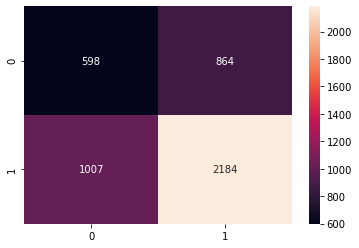

In [44]:
log_reg = LogisticRegression()
log_reg_full_model = log_reg.fit(x_train,y_train)
y_test_pred = log_reg_full_model.predict(x_test.astype(float))
y_train_pred = log_reg_full_model.predict(x_train.astype(float))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype(float),y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [45]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63      7372
           1       0.63      0.67      0.65      7372

    accuracy                           0.64     14744
   macro avg       0.64      0.64      0.64     14744
weighted avg       0.64      0.64      0.64     14744



In [46]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.37      0.41      0.39      1462
           1       0.72      0.68      0.70      3191

    accuracy                           0.60      4653
   macro avg       0.54      0.55      0.55      4653
weighted avg       0.61      0.60      0.60      4653



In [47]:
from sklearn.metrics import accuracy_score
log1_accuracy_score_train = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",log1_accuracy_score_train)
log1_accuracy_score_test = accuracy_score(y_test,y_test_pred)
print("Test accuracy = ",log1_accuracy_score_test)

Train accuracy =  0.6417525773195877
Test accuracy =  0.5978938319363851


In [48]:
# Stratified KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

skfold=StratifiedKFold(n_splits=5)
model = LogisticRegression()
log1_scores=cross_val_score(model,x,y,cv=skfold)
print(np.mean(log1_scores))

0.6710522447470721


In [49]:
# Bias and Variance error
log1_bias = 1-np.mean(log1_scores)
log1_var = np.std(log1_scores)/np.mean(log1_scores)
print('Bias error:',log1_bias)
print('Variance error:', log1_var)

Bias error: 0.32894775525292785
Variance error: 0.009158052249289336


Text(0.5, 1.0, 'ROC Curve')

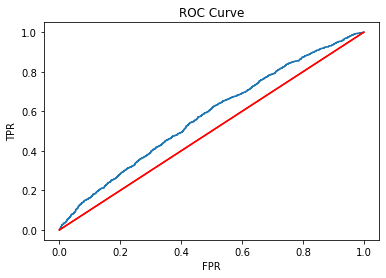

In [50]:
#ROC Curve
from sklearn.metrics import roc_curve,roc_auc_score
prob = log_reg_full_model.predict_proba(x_test)
prob = prob[:,1]
fpr,tpr,thres = roc_curve(y_test,prob)
#roc_df = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

# FEATURE ELIMINATION

### Recursive Feature Elimination

###### Features for Recursive feature elimination

In [51]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=log_reg)
rfe_model = rfe.fit(x_train,y_train)
rfe_model.ranking_

array([11, 16, 10, 15,  6, 14, 12, 13,  8,  1,  1,  1,  2,  1,  1,  1,  1,
        1,  3,  1,  5,  1,  1,  1,  1,  9,  4,  7,  1])

In [52]:
rank= pd.DataFrame()
rank['Feature']=x_train.columns
rank['Feature_Rank']=rfe_model.ranking_
fea_r=rank[rank['Feature_Rank']==1]
fea_r

,Feature,Feature_Rank
9,DEP_DELAY_EARLY,1
10,DEP_DELAY_ONTIME,1
11,SCHEDULED_DEPARTURE_Morning,1
13,SCHEDULED_DEPARTURE_Noon,1
14,ACTUAL_DEPATURE_Morning,1
15,ACTUAL_DEPATURE_Night,1
16,ACTUAL_DEPATURE_Noon,1
17,SCHEDULED_ARRIVAL_Midnight,1
19,SCHEDULED_ARRIVAL_Night,1
21,Wind_N,1


In [53]:
x_train = x_train[fea_r['Feature']]
x_test= x_test[fea_r['Feature']]

## Base Model and other Models

#### LOGISTIC REGRESSION

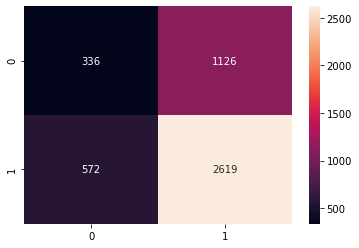

In [54]:
log_reg = LogisticRegression()
log_reg_full_model = log_reg.fit(x_train,y_train)
y_test_pred = log_reg_full_model.predict(x_test.astype(float))
y_train_pred = log_reg_full_model.predict(x_train.astype(float))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype(float),y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [55]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.37      0.23      0.28      1462
           1       0.70      0.82      0.76      3191

    accuracy                           0.64      4653
   macro avg       0.53      0.53      0.52      4653
weighted avg       0.60      0.64      0.61      4653



In [56]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.57      0.65      7372
           1       0.66      0.82      0.73      7372

    accuracy                           0.69     14744
   macro avg       0.71      0.69      0.69     14744
weighted avg       0.71      0.69      0.69     14744



In [57]:
from sklearn.metrics import accuracy_score
log_accuracy_score_train = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",log_accuracy_score_train)
log_accuracy_score_test = accuracy_score(y_test,y_test_pred)
print("Test accuracy = ",log_accuracy_score_test)

Train accuracy =  0.6946554530656538
Test accuracy =  0.6350741457124436


In [58]:
# Stratified KFold
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model = LogisticRegression()
log_scores=cross_val_score(model,x,y,cv=skfold)
print(np.mean(log_scores))

0.6710522447470721


In [59]:
# Bias and Variance error
log_bias = 1-np.mean(log_scores)
log_var = np.std(log_scores)/np.mean(log_scores)
print('Bias error:',log_bias)
print('Variance error:', log_var)

Bias error: 0.32894775525292785
Variance error: 0.009158052249289336


Text(0.5, 1.0, 'ROC Curve')

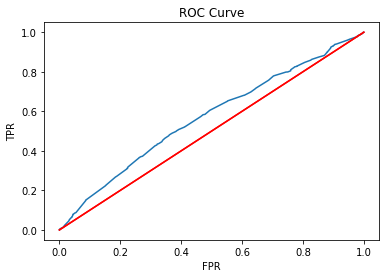

In [60]:
#ROC Curve
prob = log_reg_full_model.predict_proba(x_test)
prob = prob[:,1]
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thres = roc_curve(y_test,prob)
roc_df = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

In [61]:
log_accuracy_score_train,log_accuracy_score_test, np.mean(log_scores), log_bias, log_var

(0.6946554530656538,
 0.6350741457124436,
 0.6710522447470721,
 0.32894775525292785,
 0.009158052249289336)

In [62]:
log1_accuracy_score_train,log1_accuracy_score_test, np.mean(log1_scores), log1_bias, log1_var

(0.6417525773195877,
 0.5978938319363851,
 0.6710522447470721,
 0.32894775525292785,
 0.009158052249289336)

### K Nearest Neighbors

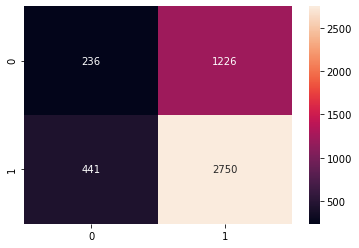

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train,y_train)
y_test_pred = knn_model.predict(x_test)
y_train_pred = knn_model.predict(x_train)
y_test_prob_1 = knn_model.predict_proba(x_test)[:,1]

cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [64]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.64      0.25      0.36      7372
           1       0.53      0.86      0.66      7372

    accuracy                           0.56     14744
   macro avg       0.59      0.56      0.51     14744
weighted avg       0.59      0.56      0.51     14744



In [65]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.35      0.16      0.22      1462
           1       0.69      0.86      0.77      3191

    accuracy                           0.64      4653
   macro avg       0.52      0.51      0.49      4653
weighted avg       0.58      0.64      0.60      4653



In [66]:
knn_accuracy_score_train = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",knn_accuracy_score_train)
knn_accuracy_score_test = accuracy_score(y_test,y_test_pred)
print("Test accuracy = ",knn_accuracy_score_test)

Train accuracy =  0.5562262615301139
Test accuracy =  0.6417365140769397


In [67]:
# Stratified KFold
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model = knn
knn_scores=cross_val_score(model,x,y,cv=skfold)
print(np.mean(knn_scores))

0.6281043260727234


In [68]:
# Bias and Variance error
knn_bias = 1-np.mean(knn_scores)
knn_var = np.std(knn_scores)/np.mean(knn_scores)

print('Bias error:', knn_bias)
print('Variance error:', knn_var)

Bias error: 0.3718956739272766
Variance error: 0.01044271578581613


Text(0.5, 1.0, 'ROC Curve')

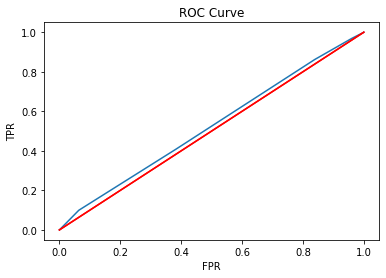

In [69]:
# ROC Curve
prob = knn_model.predict_proba(x_test)
prob = prob[:,1]
fpr,tpr,thres = roc_curve(y_test,prob)
roc_df = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

### DECISION TREE

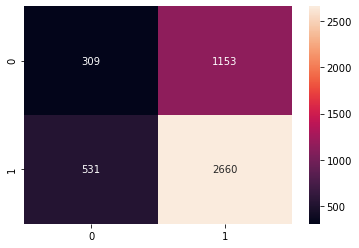

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(x_train,y_train)
y_test_pred = dt_model.predict(x_test)
y_train_pred = dt_model.predict(x_train)
y_test_prob_1 = dt_model.predict_proba(x_test)[:,1]

cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [71]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.56      0.66      7372
           1       0.66      0.84      0.74      7372

    accuracy                           0.70     14744
   macro avg       0.72      0.70      0.70     14744
weighted avg       0.72      0.70      0.70     14744



In [72]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.37      0.21      0.27      1462
           1       0.70      0.83      0.76      3191

    accuracy                           0.64      4653
   macro avg       0.53      0.52      0.51      4653
weighted avg       0.59      0.64      0.61      4653



In [73]:
dt_accuracy_score_train = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",dt_accuracy_score_train)
dt_accuracy_score_test = accuracy_score(y_test,y_test_pred)
print("Test accuracy = ",dt_accuracy_score_test)

Train accuracy =  0.7036760716223549
Test accuracy =  0.6380829572318935


In [74]:
# Stratified KFold
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model = dt
dt_scores=cross_val_score(model,x,y,cv=skfold)
print(np.mean(dt_scores))

0.5264733137601876


In [75]:
# Bias and Variance error
dt_bias = 1-np.mean(dt_scores)
dt_var = np.std(dt_scores)/np.mean(dt_scores)
print('Bias error:',dt_bias)
print('Variance error:', dt_var)

Bias error: 0.4735266862398124
Variance error: 0.04086744802724142


Text(0.5, 1.0, 'ROC Curve')

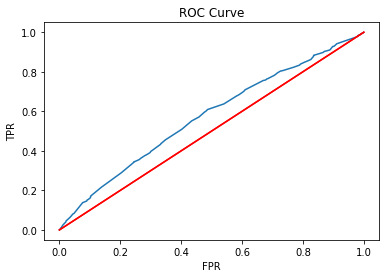

In [76]:
# ROC Curve
prob = dt_model.predict_proba(x_test)
prob = prob[:,1]
fpr,tpr,thres = roc_curve(y_test,prob)
roc_df = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

### RANDOM FOREST

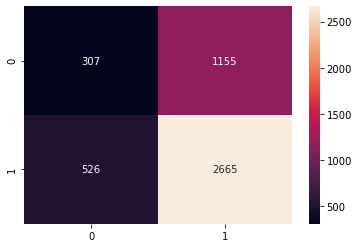

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(x_train,y_train)
y_test_pred = rf_model.predict(x_test)
y_train_pred = rf_model.predict(x_train)
y_test_prob_1 = rf_model.predict_proba(x_test)[:,1]

cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [78]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65      7372
           1       0.66      0.85      0.74      7372

    accuracy                           0.70     14744
   macro avg       0.72      0.70      0.70     14744
weighted avg       0.72      0.70      0.70     14744



In [79]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.37      0.21      0.27      1462
           1       0.70      0.84      0.76      3191

    accuracy                           0.64      4653
   macro avg       0.53      0.52      0.51      4653
weighted avg       0.59      0.64      0.61      4653



In [80]:
from sklearn.metrics import accuracy_score
rf_accuracy_score_train = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",rf_accuracy_score_train)
rf_accuracy_score_test = accuracy_score(y_test,y_test_pred)
print("Test accuracy = ",rf_accuracy_score_test)

Train accuracy =  0.7036760716223549
Test accuracy =  0.6387277025574898


In [81]:
# Stratified KFold
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model = rf
rf_scores=cross_val_score(model,x,y,cv=skfold)
print(np.mean(rf_scores))

0.6224954159875633


In [82]:
# Bias and Variance error
rf_bias = 1-np.mean(rf_scores)
rf_var = np.std(rf_scores)/np.mean(rf_scores)
print('Bias error:',rf_bias)
print('Variance error:', rf_var)

Bias error: 0.3775045840124367
Variance error: 0.07207080634732375


Text(0.5, 1.0, 'ROC Curve')

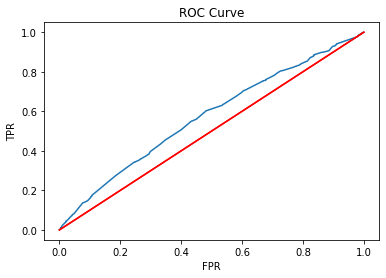

In [83]:
# ROC Curve
prob = rf_model.predict_proba(x_test)
prob = prob[:,1]
fpr,tpr,thres = roc_curve(y_test,prob)
roc_df = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

#### GRADIENT BOOSTING

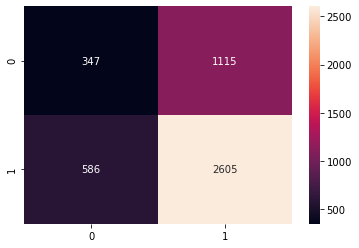

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb_model = gb.fit(x_train,y_train)
y_test_pred = gb_model.predict(x_test)
y_train_pred = gb_model.predict(x_train)
y_test_prob_1 = gb_model.predict_proba(x_test)[:,1]

cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [85]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.58      0.66      7372
           1       0.66      0.82      0.73      7372

    accuracy                           0.70     14744
   macro avg       0.71      0.70      0.69     14744
weighted avg       0.71      0.70      0.69     14744



In [86]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.37      0.24      0.29      1462
           1       0.70      0.82      0.75      3191

    accuracy                           0.63      4653
   macro avg       0.54      0.53      0.52      4653
weighted avg       0.60      0.63      0.61      4653



In [87]:
from sklearn.metrics import accuracy_score
gb_accuracy_score_train = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",gb_accuracy_score_train)
gb_accuracy_score_test = accuracy_score(y_test,y_test_pred)
print("Train accuracy = ",gb_accuracy_score_test)

Train accuracy =  0.6975040694519805
Train accuracy =  0.6344294003868471


In [88]:
# Stratified KFold
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model = gb
gb_scores=cross_val_score(model,x,y,cv=skfold)
print(np.mean(gb_scores))

0.6644115758087229


In [89]:
# Bias and Variance error
gb_bias = 1-np.mean(gb_scores)
gb_var = np.std(gb_scores)/np.mean(gb_scores)
print('Bias error:',gb_bias)
print('Variance error:', gb_var)

Bias error: 0.3355884241912771
Variance error: 0.04243974756694439


Text(0.5, 1.0, 'ROC Curve')

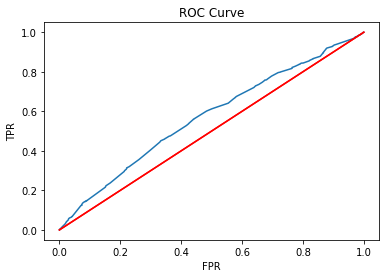

In [90]:
# ROC Curve
prob = gb_model.predict_proba(x_test)
prob = prob[:,1]
fpr,tpr,thres = roc_curve(y_test,prob)
roc_df = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

#### ADA BOOST MODEL

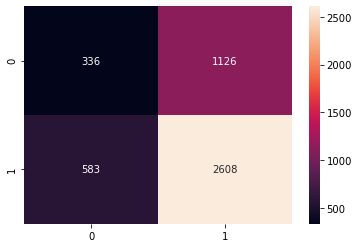

In [91]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada_model = ada.fit(x_train,y_train)
y_test_pred = ada_model.predict(x_test)
y_train_pred = ada_model.predict(x_train)
y_test_prob_1 = ada_model.predict_proba(x_test)[:,1]

cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [92]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.57      0.65      7372
           1       0.66      0.82      0.73      7372

    accuracy                           0.69     14744
   macro avg       0.71      0.69      0.69     14744
weighted avg       0.71      0.69      0.69     14744



In [93]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.37      0.23      0.28      1462
           1       0.70      0.82      0.75      3191

    accuracy                           0.63      4653
   macro avg       0.53      0.52      0.52      4653
weighted avg       0.59      0.63      0.61      4653



In [94]:
from sklearn.metrics import accuracy_score
ada_accuracy_score_train = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",ada_accuracy_score_train)
ada_accuracy_score_test = accuracy_score(y_test,y_test_pred)
print("Train accuracy = ",ada_accuracy_score_test)

Train accuracy =  0.6949945740640261
Train accuracy =  0.6327100795185902


In [95]:
# Stratified KFold
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model = ada
ada_scores=cross_val_score(model,x,y,cv=skfold)
print(np.mean(ada_scores))

0.6724061891392952


In [96]:
# Bias and Variance error
ada_bias = 1-np.mean(ada_scores)
ada_var = np.std(ada_scores)/np.mean(ada_scores)
print('Bias error:',ada_bias)
print('Variance error:', ada_var)

Bias error: 0.3275938108607048
Variance error: 0.011836032475669108


Text(0.5, 1.0, 'ROC Curve')

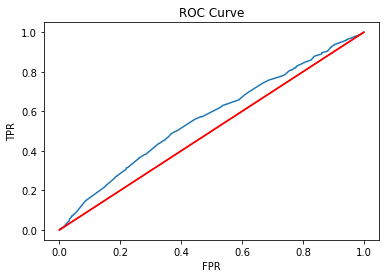

In [97]:
# ROC Curve
prob = ada_model.predict_proba(x_test)
prob = prob[:,1]
fpr,tpr,thres = roc_curve(y_test,prob)
roc_df = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

#### XG BOOSTING MODEL

[11:53:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


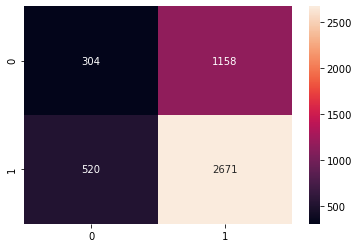

In [98]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg_model = xg.fit(x_train,y_train)
y_test_pred = xg_model.predict(x_test)
y_train_pred = xg_model.predict(x_train)

cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [99]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65      7372
           1       0.66      0.85      0.74      7372

    accuracy                           0.70     14744
   macro avg       0.72      0.70      0.70     14744
weighted avg       0.72      0.70      0.70     14744



In [100]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.37      0.21      0.27      1462
           1       0.70      0.84      0.76      3191

    accuracy                           0.64      4653
   macro avg       0.53      0.52      0.51      4653
weighted avg       0.59      0.64      0.61      4653



In [101]:
from sklearn.metrics import accuracy_score
xg_accuracy_score_train = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",xg_accuracy_score_train)
xg_accuracy_score_test = accuracy_score(y_test,y_test_pred)
print("Train accuracy = ",xg_accuracy_score_test)

Train accuracy =  0.7032691264243082
Train accuracy =  0.6393724478830862


In [102]:
# Stratified KFold
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model = xg
xg_scores=cross_val_score(model,x,y,cv=skfold)
print(np.mean(xg_scores))

[11:53:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [103]:
# Bias and Variance error
xg_bias = 1-np.mean(xg_scores)
xg_var = np.std(xg_scores)/np.mean(xg_scores)
print('Bias error:',rf_bias)
print('Variance error:', rf_var)

Bias error: 0.3775045840124367
Variance error: 0.07207080634732375


Text(0.5, 1.0, 'ROC Curve')

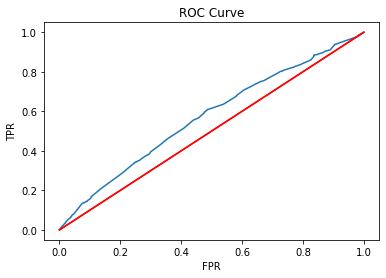

In [104]:
# ROC Curve
prob = xg_model.predict_proba(x_test)
prob = prob[:,1]
fpr,tpr,thres = roc_curve(y_test,prob)
roc_df = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')